In [50]:
%matplotlib inline
from __future__ import print_function
import pandas as pd

# Some sample data
iris_df = pd.read_csv('iris.csv')
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

# Module 5: Python Graphics Gallery

## Overview
This will be a short overview of the different graphics packages available in Python in "gallery" form.  The intent is not so much to learn the code, but to see the possibilities.  We'll be looking at examples from these packages:
* matplotlib (https://matplotlib.org/)
* seaborn (https://seaborn.pydata.org/
* bokeh (https://bokeh.pydata.org/en/latest/
* plotly (https://plot.ly/)
* ggplot (in Python) (http://ggplot.yhathq.com/

For each package, we'll show the code required to create a simple scatterplot, a simple line chart, and showcase a "wow" figure.  These are all examples I've pulled from the packages' documentation and I've provided the link to each above.

We'll also be looking at the mapping package folium (http://python-visualization.github.io/folium/).

## Matplotlib
From the matplotlib website:
> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib tries to make easy things easy and hard things possible.

### Simple scatterplot

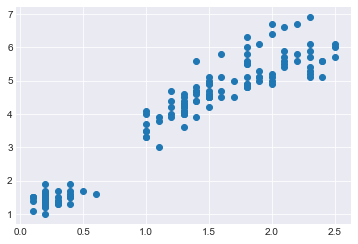

In [53]:
import matplotlib.pyplot as plt
plt.scatter(iris_df['petal_width'], iris_df['petal_length'])

### Simple line plot

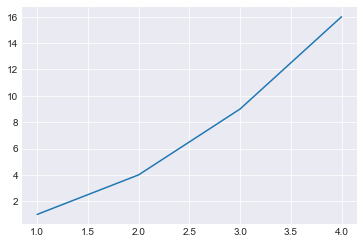

In [54]:
plt.plot(x, y)

### Sample "wow" figure

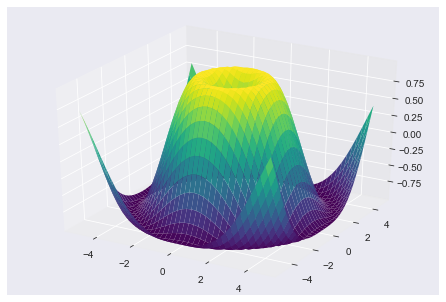

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

plt.show()

## Seaborn
From the Seaborn website:
> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

Seaborn has tight integration with pandas DataFrames.

### Simple scatterplot

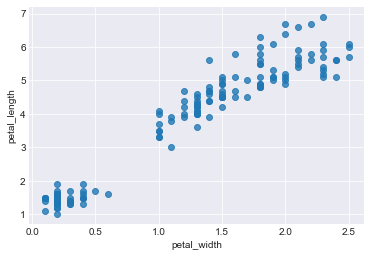

In [55]:
import seaborn as sns
sns.regplot(x='petal_width', y='petal_length', data=iris_df, fit_reg=False);

### Simple line plot

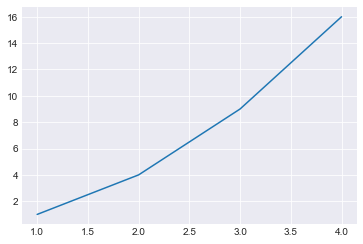

In [56]:
# Note this is just styling a matplotlib figure
sns.set_style("darkgrid")
plt.plot(x, y);

### Sample "wow" figure

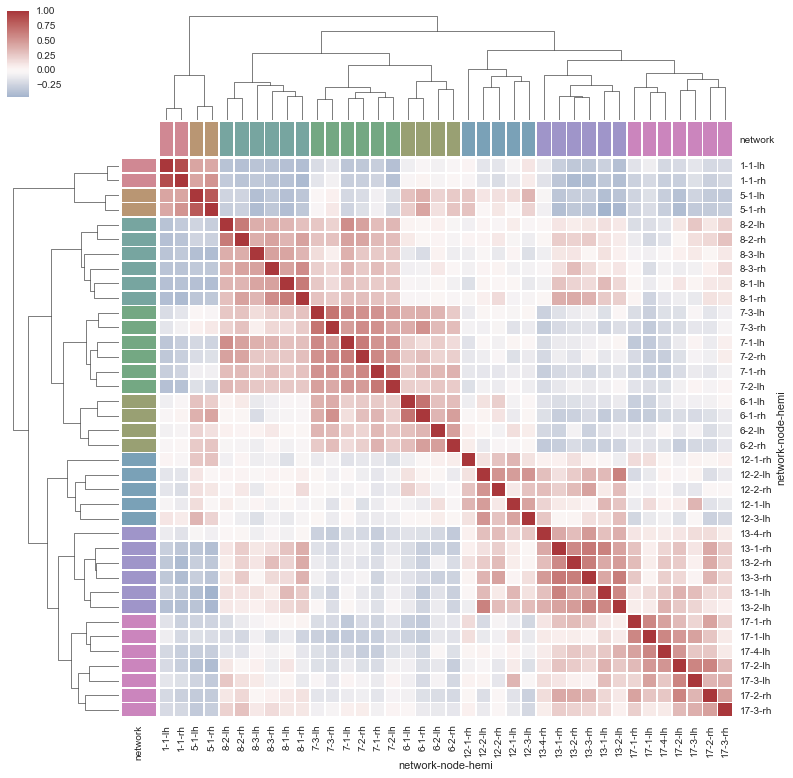

In [67]:
import pandas as pd
import seaborn as sns
sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

## ggplot (Python)
From the ggplot website:
> ggplot is a plotting system for Python based on R's ggplot2 and the Grammar of Graphics. It is built for making professional looking, plots quickly with minimal code.

### Simple scatterplot

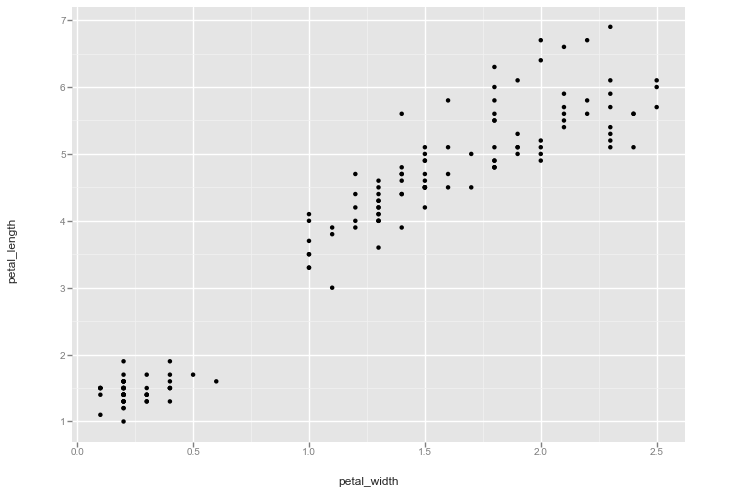

<ggplot: (29842907)>

In [71]:
from ggplot import *
ggplot(aes(x='petal_width', y='petal_length'), data=iris_df) + geom_point()

### Simple line plot

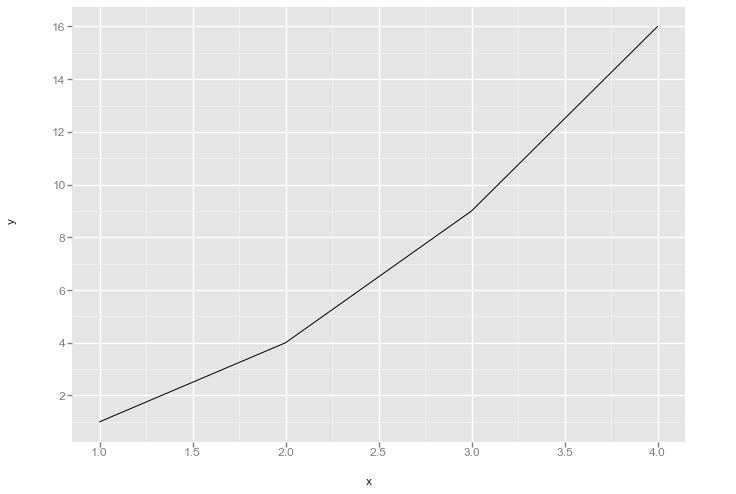

<ggplot: (29000051)>

In [65]:
# Have to convert x and y to pandas DataFrame
d = {
    'x' : pd.Series(x),
    'y' : pd.Series(y)
}
df = pd.DataFrame(d)
ggplot(aes(x='x', y='y'), data=df) + geom_line()

### Sample "wow" figure

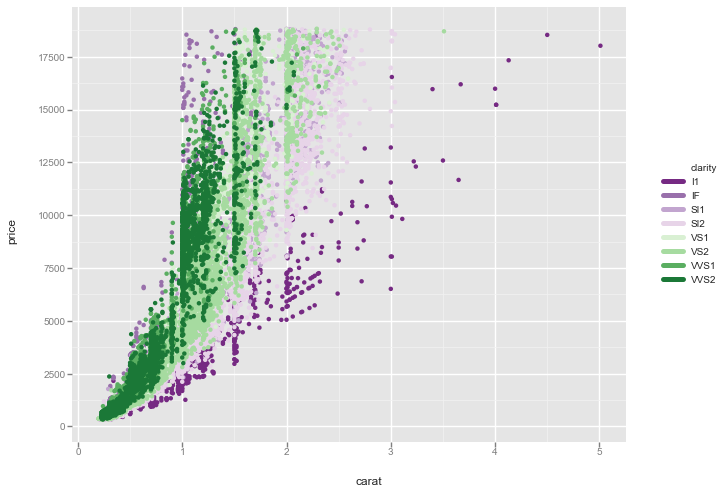

<ggplot: (27767093)>

In [74]:
ggplot(aes(x='carat', y='price', color='clarity'), data=diamonds) + geom_point() + scale_color_brewer(type='div', palette=2)

## Bokeh
From the Bokeh website:
> Bokeh is an interactive visualization library that targets modern web browsers for presentation. Its goal is to provide elegant, concise construction of versatile graphics, and to extend this capability with high-performance interactivity over very large or streaming datasets. Bokeh can help anyone who would like to quickly and easily create interactive plots, dashboards, and data applications.

### Simple scatterplot

In [57]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.circle(iris_df['petal_width'], iris_df['petal_length'], size=8, color="navy", alpha=0.5)

# Output to the notebook
output_notebook()

# show the results
show(p)

Loading BokehJS ...

### Simple line plot

In [58]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

p = figure(plot_width=400, plot_height=400)

# add a line renderer
p.line(x, y, color="navy")

# Output to the notebook
output_notebook()

# show the results
show(p)

Loading BokehJS ...

### Sample "wow" figure

In [69]:
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO

from bokeh.plotting import figure, show

antibiotics = """
bacteria,                        penicillin, streptomycin, neomycin, gram
Mycobacterium tuberculosis,      800,        5,            2,        negative
Salmonella schottmuelleri,       10,         0.8,          0.09,     negative
Proteus vulgaris,                3,          0.1,          0.1,      negative
Klebsiella pneumoniae,           850,        1.2,          1,        negative
Brucella abortus,                1,          2,            0.02,     negative
Pseudomonas aeruginosa,          850,        2,            0.4,      negative
Escherichia coli,                100,        0.4,          0.1,      negative
Salmonella (Eberthella) typhosa, 1,          0.4,          0.008,    negative
Aerobacter aerogenes,            870,        1,            1.6,      negative
Brucella antracis,               0.001,      0.01,         0.007,    positive
Streptococcus fecalis,           1,          1,            0.1,      positive
Staphylococcus aureus,           0.03,       0.03,         0.001,    positive
Staphylococcus albus,            0.007,      0.1,          0.001,    positive
Streptococcus hemolyticus,       0.001,      14,           10,       positive
Streptococcus viridans,          0.005,      10,           40,       positive
Diplococcus pneumoniae,          0.005,      11,           10,       positive
"""

drug_color = OrderedDict([
    ("Penicillin",   "#0d3362"),
    ("Streptomycin", "#c64737"),
    ("Neomycin",     "black"  ),
])

gram_color = {
    "positive" : "#aeaeb8",
    "negative" : "#e69584",
}

df = pd.read_csv(StringIO(antibiotics),
                 skiprows=1,
                 skipinitialspace=True,
                 engine='python')

width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = sqrt(log(.001 * 1E4))
maxr = sqrt(log(1000 * 1E4))
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

def rad(mic):
    return a * np.sqrt(np.log(mic * 1E4)) + b

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=(-420, 420), y_range=(-420, 420),
    min_border=0, outline_line_color="black",
    background_fill_color="#f0e1d2")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# annular wedges
angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle
colors = [gram_color[gram] for gram in df.gram]
p.annular_wedge(
    0, 0, inner_radius, outer_radius, -big_angle+angles, angles, color=colors,
)

# small wedges
p.annular_wedge(0, 0, inner_radius, rad(df.penicillin),
                -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
                color=drug_color['Penicillin'])
p.annular_wedge(0, 0, inner_radius, rad(df.streptomycin),
                -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
                color=drug_color['Streptomycin'])
p.annular_wedge(0, 0, inner_radius, rad(df.neomycin),
                -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
                color=drug_color['Neomycin'])

# circular axes and lables
labels = np.power(10.0, np.arange(-3, 4))
radii = a * np.sqrt(np.log(labels * 1E4)) + b
p.circle(0, 0, radius=radii, fill_color=None, line_color="white")
p.text(0, radii[:-1], [str(r) for r in labels[:-1]],
       text_font_size="8pt", text_align="center", text_baseline="middle")

# radial axes
p.annular_wedge(0, 0, inner_radius-10, outer_radius+10,
                -big_angle+angles, -big_angle+angles, color="black")

# bacteria labels
xr = radii[0]*np.cos(np.array(-big_angle/2 + angles))
yr = radii[0]*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, df.bacteria, angle=label_angle,
       text_font_size="9pt", text_align="center", text_baseline="middle")

# OK, these hand drawn legends are pretty clunky, will be improved in future release
p.circle([-40, -40], [-370, -390], color=list(gram_color.values()), radius=5)
p.text([-30, -30], [-370, -390], text=["Gram-" + gr for gr in gram_color.keys()],
       text_font_size="7pt", text_align="left", text_baseline="middle")

p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
       color=list(drug_color.values()))
p.text([-15, -15, -15], [18, 0, -18], text=list(drug_color),
       text_font_size="9pt", text_align="left", text_baseline="middle")

output_notebook()

show(p)

Loading BokehJS ...

## Plotly
From the plotly website
> Create interactive, D3 and WebGL charts in Python. All the chart types of matplotlib and more

Does not require a plot.ly account but you can save plots directly online with an account

### Simple scatterplot

In [61]:
import plotly
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = iris_df['petal_width'],
    y = iris_df['petal_length'],
    mode = 'markers'
)

plotly.offline.init_notebook_mode(connected=True)

# Plot and embed in ipython notebook
plotly.offline.iplot([trace])

### Simple line plot

In [63]:
import plotly
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x = x,
    y = y
)

plotly.offline.init_notebook_mode(connected=True)

# Plot and embed in ipython notebook
plotly.offline.iplot([trace])

### Sample "wow" figure

In [70]:
import plotly
import plotly.graph_objs as go

import numpy as np

x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2, y2, z2 = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 200).transpose()
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)

plotly.offline.init_notebook_mode(connected=True)

# Plot and embed in ipython notebook
plotly.offline.iplot(fig)

## Folium - Python data + Leaflet.js maps
From the Folium website
> folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in a Leaflet map via folium.

In [79]:
import folium
m = folium.Map(
    location=[45.372, -121.6972],
    zoom_start=12,
    tiles='Stamen Terrain'
)

folium.Marker(
    location=[45.3288, -121.6625],
    popup='Mt. Hood Meadows',
    icon=folium.Icon(icon='cloud')
).add_to(m)

folium.Marker(
    location=[45.3311, -121.7113],
    popup='Timberline Lodge',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    location=[45.3300, -121.6823],
    popup='Some Other Location',
    icon=folium.Icon(color='red', icon='info-sign')
).add_to(m)
m

In [80]:
import numpy as np
from folium.plugins import HeatMap

data = (np.random.normal(size=(100, 3)) *
        np.array([[1, 1, 1]]) +
        np.array([[48, 5, 1]])).tolist()
m = folium.Map([48., 5.], tiles='stamentoner', zoom_start=6)
HeatMap(data).add_to(m)
m